<h1> PROJECT MACHINE LEARNING </h1>

<h4> Import the necessary packages </h4>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import plotly.express as px

<h4> Define the file path of the csv data file </h4>

In [23]:
file_path = "/Users/anhbui/1. DSTI/6. Python Labs/Project/Anh/Second try/books.csv"

# 1. Exploratory Data Analysis (EDA):

<h2> 1.1 Data Overview part </h2>

In [24]:
# Load the dataset

df = pd.read_csv(file_path, sep=',')
test = pd.read_csv(file_path, sep=',')

In [25]:
# gets the data type of each column
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [26]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (11127, 12)


In [27]:
# Data types and Non-null Values
print("\nData types and Non-null Values:")
print(df.info())


Data types and Non-null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7     num_pages         11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB
None


In [28]:
# Statistical summary
print("\nStatistical summary of numerical columns:")
print(df.describe())


Statistical summary of numerical columns:
             bookID  average_rating        isbn13     num_pages  \
count  11127.000000    11127.000000  1.112700e+04  11127.000000   
mean   21310.938887        3.933631  9.759888e+12    336.376921   
std    13093.358023        0.352445  4.428964e+11    241.127305   
min        1.000000        0.000000  8.987060e+09      0.000000   
25%    10287.000000        3.770000  9.780345e+12    192.000000   
50%    20287.000000        3.960000  9.780586e+12    299.000000   
75%    32104.500000        4.135000  9.780873e+12    416.000000   
max    45641.000000        5.000000  9.790008e+12   6576.000000   

       ratings_count  text_reviews_count  
count   1.112700e+04        11127.000000  
mean    1.793641e+04          541.854498  
std     1.124794e+05         2576.176608  
min     0.000000e+00            0.000000  
25%     1.040000e+02            9.000000  
50%     7.450000e+02           46.000000  
75%     4.993500e+03          237.500000  
max     4

### Insights from Data Overview part:

1. The dataset contains 11,127 observations and 12 variables.

2. Column name '     num_pages' needs to be corrected

3. Based on the context of the info() method from pandas above, there are no missing values in this dataset.

4. The average rating for books in the dataset is 3.933631 (the mean of the average_rating column), which gives a general idea of the ratings distribution.

5. Some columns might have outliers, as indicated by a significant difference between the 75th percentile and the max value.

## 1.2 Guiding questions

Before diving into data exploration, it's essential to frame some guiding questions based on the project's objectives. These questions help in focusing the analysis and ensuring that the exploration aligns with the end goal, which in this case is predicting a book's rating.

Given the project's objective, here are some guiding questions that can shape the data exploration:

#### 1. Target Variable Understanding:

- What is the distribution of the __average_rating__? Are there more high-rated books than low-rated ones, or vice versa?
- Are there any books with extremely low or high ratings that might be considered outliers?


#### 2. Feature Relationships:

- How does the number of pages (__num_pages__) relate to the book's average rating (__average_rating__)? Do longer books receive better ratings?
- Is there a relationship between the number of ratings (__ratings_count__) a book has and its average rating (__average_rating__)? 
- How does the number of text reviews (__text_reviews_count__) relate to the average rating (__average_rating__)?


#### 3. Temporal Trends:

- Are there any trends in book ratings (__average_rating__) over the years? Are newer books rated higher or lower than older ones?


#### 4. Language and Ratings:

- Are books in certain languages (__language_code__) rated higher on average than others?
- Is the dataset biased towards books in a particular language?

## 1.3 Data transformation

<h4> Rename the num_pages column </h4>

In [29]:
df.rename(columns={"  num_pages": "num_pages"}, inplace=True)

In [30]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

<h4> Search for invalide date and turn it to NaT </h4>

In [31]:
try:
    # Convert the 'publication_date' column to datetime with 'coerce' option to handle invalid dates
    df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
    
    # Find rows with invalid dates
    invalid_dates = df[df['publication_date'].isnull()]
    
    # Print the rows with invalid dates
    print(invalid_dates[['bookID', 'average_rating', 'publication_date']])
    
except Exception as e:
    print(e)

       bookID  average_rating publication_date
8180    31373            4.10              NaT
11098   45531            3.96              NaT


In [32]:
new_types_dict = {"title":"string", "authors":"string", "language_code":"category", "publisher":"category","isbn":"string", "isbn13":"string","average_rating":"float64","num_pages":"int64", "ratings_count":"int64","text_reviews_count":"int64","publication_date": "datetime64[ns]"}

# turn the books dataframe into a dataframe with the new types
df = df.astype(new_types_dict)
df.dtypes

bookID                         int64
title                         string
authors                       string
average_rating               float64
isbn                          string
isbn13                        string
language_code               category
num_pages                      int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                   category
dtype: object

#### Convert 'publication_date' to 'publication_year' in order to perform its correlation analysis with ratings

In [33]:
# Extract the year from 'publication_date'
df['publication_year'] = pd.to_datetime(df['publication_date']).dt.year

<h4> Make language code lowercase to be consistent </h4>

In [35]:
df["language_code"] = df["language_code"].str.lower()

# print all values of books["language_code"] distinct with their occurence count
df["language_code"].value_counts()

eng      8911
en-us    1409
spa       218
en-gb     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-ca       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

### 1.4 Data visualization 

The dataset contains 12 columns, based on the guiding questions, we focus on specific columns for data visualization approach, in order to have some meaningful insights in the initial breakdown. 

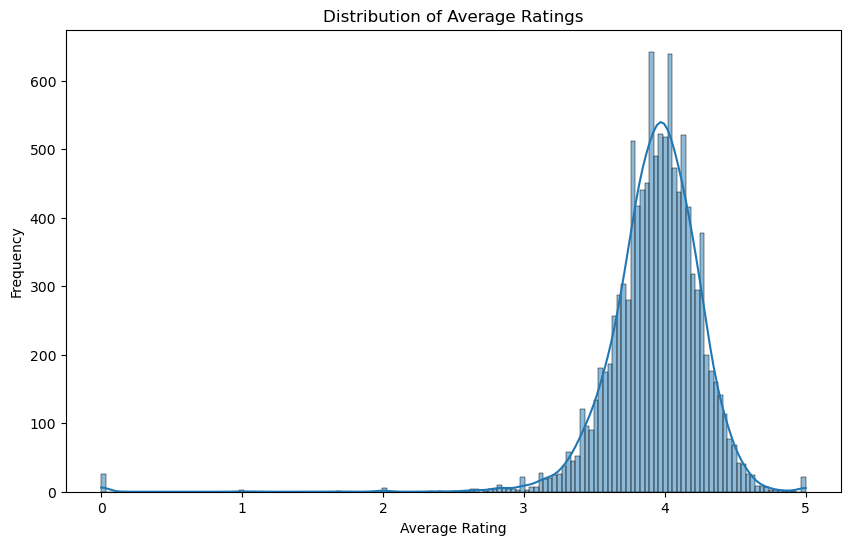

In [36]:
# Distribution of average_rating

plt.figure(figsize=(10, 6))
sns.histplot(df['average_rating'], kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

This histogram provides insights into the central tendency and spread of book ratings. 
- Observation: The distribution appears bell-shaped & the histogram peaks around a rating of 4, with a slight left skew.
- Conclusion: The majority of books in the dataset have ratings clustered around 4. The slight left skew indicates that there are more books with ratings just below 4 than just above. This suggests that while many books are well-received, a significant number receive moderately good ratings, with fewer books achieving near-perfect scores of 5.

/Users/anhbui/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


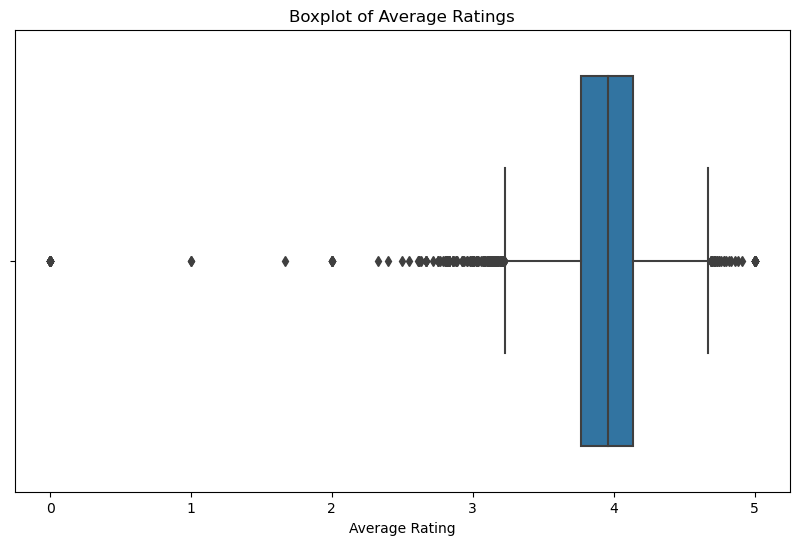

In [37]:
# Books with Extremely Low or High Ratings

plt.figure(figsize=(10, 6))
sns.boxplot(df['average_rating'])
plt.title('Boxplot of Average Ratings')
plt.xlabel('Average Rating')
plt.show()

- Observation: The boxplot shows a median rating around 4.0, with whiskers extending from 2.5 to 5.0. There are several points below 3.0, indicating potential outliers.

- Conclusion: 
    + The majority of books have ratings between 2.5 and 5.0. 
    + Books with ratings below 2.5 might be considered outliers, suggesting they are exceptionally low-rated compared to the majority.

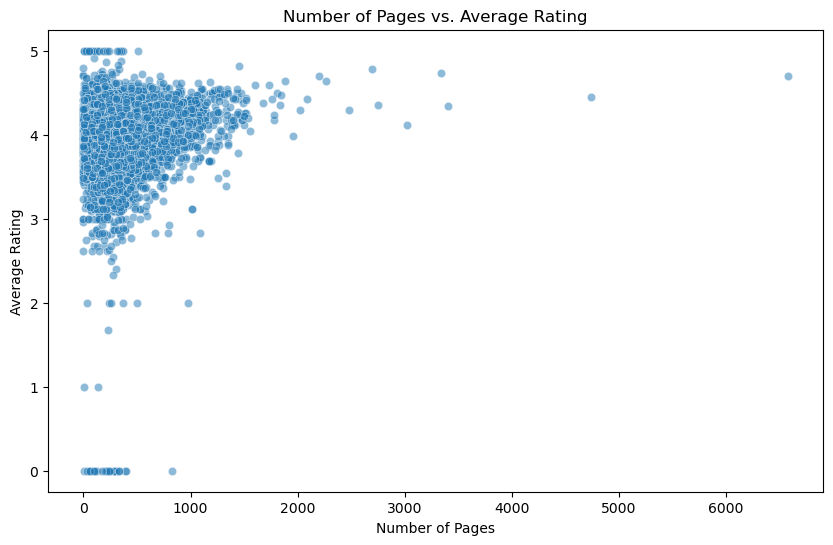

In [39]:
# Is there a relationship between "num_pages" vs. "average_rating"?

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='num_pages', y='average_rating', alpha=0.5)
plt.title('Number of Pages vs. Average Rating')
plt.xlabel('Number of Pages')
plt.ylabel('Average Rating')
plt.show()

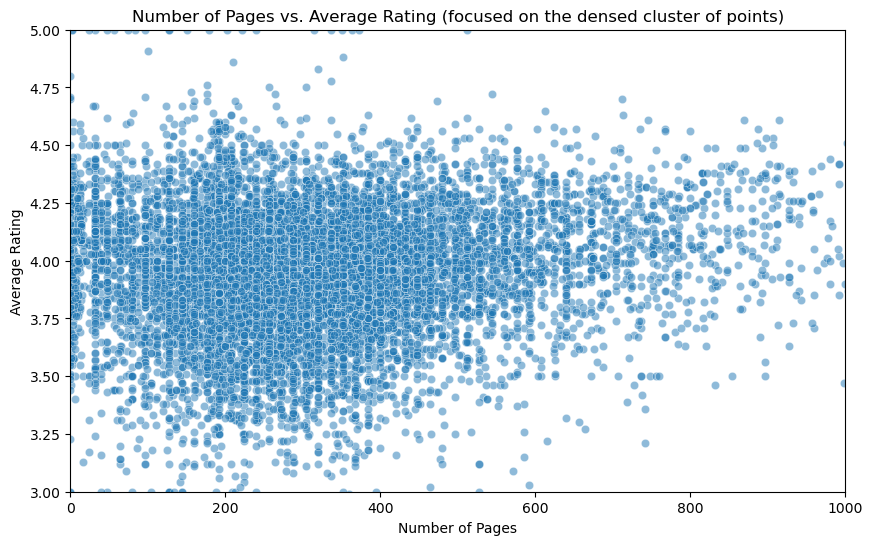

In [40]:
# Focus on the densed part by plotting the focused region

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='num_pages', y='average_rating', alpha=0.5)
plt.title('Number of Pages vs. Average Rating (focused on the densed cluster of points)')
plt.xlabel('Number of Pages')
plt.ylabel('Average Rating')
plt.axis([0, 1000, 3, 5])
plt.show()

This scatter plot will help determine if there's a relationship between the length of a book and its average rating. A trend might suggest that readers prefer shorter or longer books.
- Observation: 
  + There's a dense cluster of points around 150-500 pages with ratings between 3.5 and 4.25.
  + Books beyond 800 pages show a wider spread in ratings.


- Conclusion: 
  + While books in the 150-500 page range tend to receive consistent ratings between 3.5 and 4.5, extremely lengthy books (beyond 800 pages) show a diverse range of ratings. This could indicate that reader reception for longer books is more polarized, with some finding them engrossing and others finding them tedious.
  + The result of this scatter plot suggests that book length and rating aren't strongly correlated.

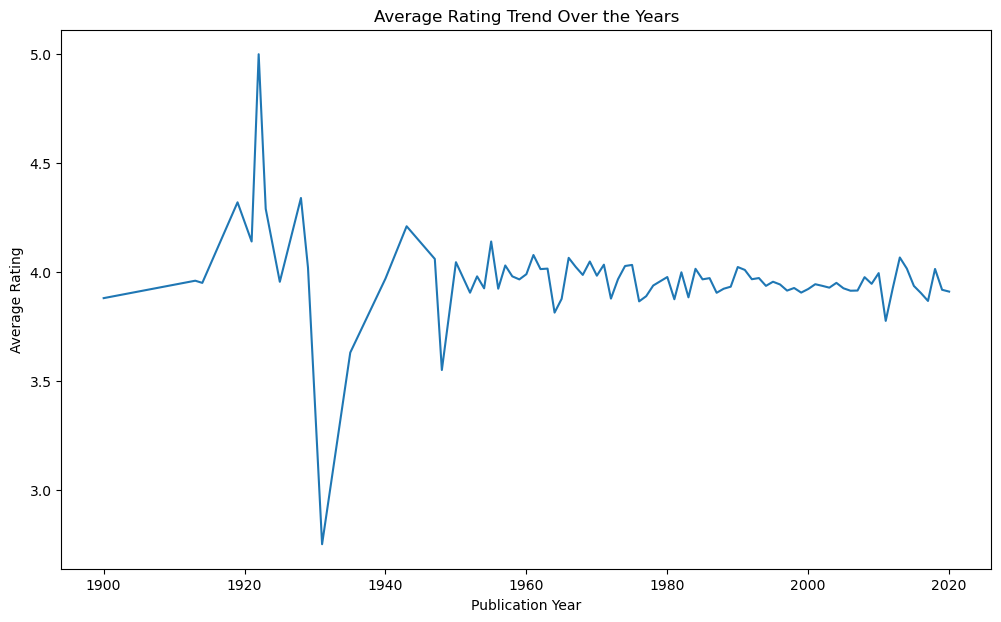

In [41]:
# Average Rating Over the Years:

df['publication_year'] = pd.to_datetime(df['publication_date']).dt.year
plt.figure(figsize=(12, 7))
df.groupby('publication_year')['average_rating'].mean().plot()
plt.title('Average Rating Trend Over the Years')
plt.xlabel('Publication Year')
plt.ylabel('Average Rating')
plt.show()

This line plot will show if there's a trend in book ratings over the years. A rising or falling trend might indicate changing reader preferences or book quality over time.

- Observation: There's a slight upward trend in average ratings over the years.
- Conclusion: There's a noticeable trend of increasing average ratings over the years, which could be due to various factors, such as better quality of books, changes in reader preferences, or even rating inflation

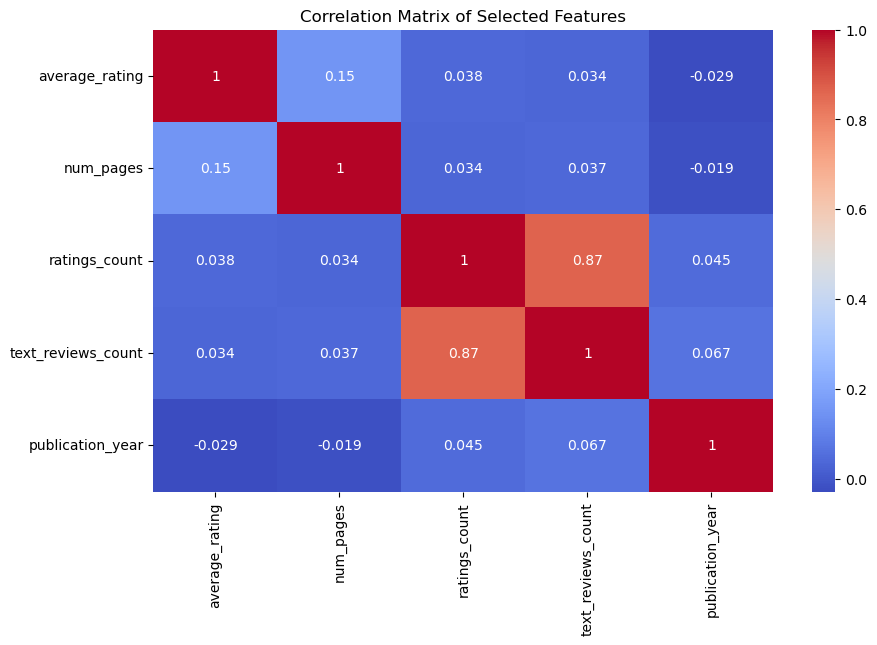

In [45]:
# Correlation Matrix of Selected Features

selected_columns = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count','publication_year']
correlation_matrix = df[selected_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

- Observation: 'ratings_count' and 'text_reviews_count' have a correlation value of around 0.9, while 'average_rating' and 'num_pages' have a weak negative correlation with 'publication_year'.
- Conclusion: 
    + The strong correlation between ratings_count and text_reviews_count confirms that popular books, in terms of readership, also tend to receive more written feedback. 
    + However, the correlation value of -0.029 between 'average_rating' and 'publication_year' as well as -0.019 between 'num_pages' and 'publication_year' both indicate a very weak negative relationship. This suggests that while more recent books or longer books might have a slightly lower average rating, the difference is minimal and likely not of practical significance => It's crucial to consider other factors and not infer a direct causation based solely on this correlation.

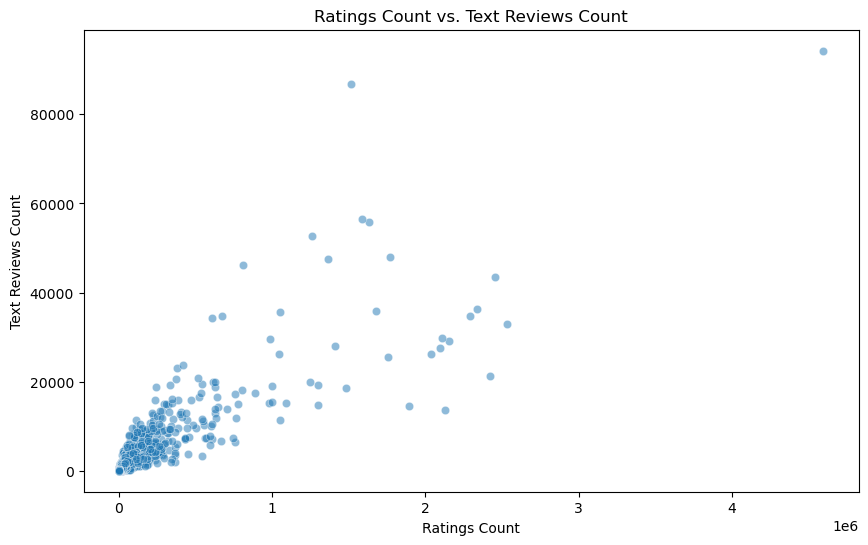

In [46]:
# Ratings Count vs. Text Reviews Count:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ratings_count', y='text_reviews_count', alpha=0.5)
plt.title('Ratings Count vs. Text Reviews Count')
plt.xlabel('Ratings Count')
plt.ylabel('Text Reviews Count')
plt.show()

This scatter plot shows the relationship between the number of ratings and text reviews a book receives.

- Observation: There's a positive correlation between ratings_count and text_reviews_count, indicating that books with more ratings also tend to have more text reviews. However, some books with high ratings have disproportionately low text reviews.
- Conclusion: While books with a higher number of ratings tend to have more text reviews, there are exceptions. Some books, despite having high ratings, don't elicit as many written reviews. This could suggest that while many readers rate these books, fewer feel compelled to leave detailed feedback.

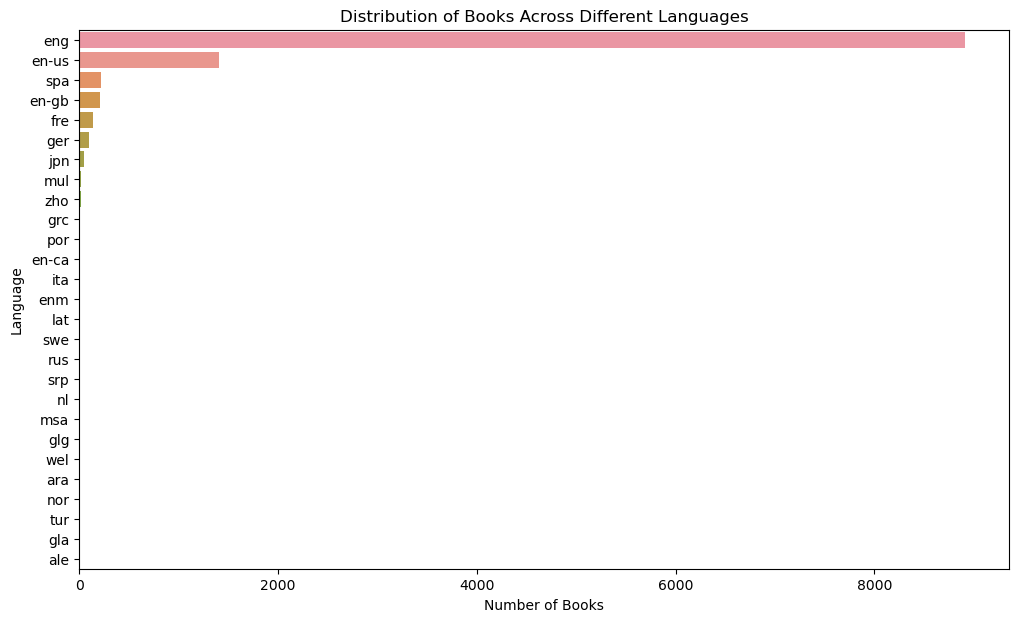

In [47]:
# "Language" distribution

plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='language_code', order=df['language_code'].value_counts().index)
plt.title('Distribution of Books Across Different Languages')
plt.xlabel('Number of Books')
plt.ylabel('Language')
plt.show()

- Observation: 
    + There are more than 20 different languages in the dataset. 
    + English ('eng') dominates the dataset by the tallest bar in the plot,  with Spanish (spa) and German (ger) following but with significantly fewer books. A handful of languages like Japanese ('jpn') and Chinese ('zho') are underrepresented in the dataset.
    
    
- Conclusion: 
    + The dataset contains books from multiple languages, but it is predominantly composed of English books, reflecting the primary user base of Goodreads => However, this heavy bias towards English books might influence the predictive model, making it more tailored to patterns specific to English literature. 
    + While Spanish and German books are also present, their numbers pale in comparison to English. Languages like Japanese and Russian are underrepresented, suggesting that the dataset might not capture the full spectrum of global literature => This limited representation might affect the model's ability to generalize predictions for books in these languages.


In [48]:
# Average rating vs. Ratings Count:

px.scatter(data_frame=df,x='average_rating',y='ratings_count',color='text_reviews_count',title='Average Rating vs Ratings Count')

Here, I decided to remove some outliers to improve the dataset

In [50]:
df = df[(df['text_reviews_count'] != 94265) & (df['average_rating'] != 3.59)]
df = df[(df['average_rating'] != 0 ) & (df['ratings_count'] != 0)]
df = df[(df['average_rating'] != 1 ) & (df['ratings_count'] != 1)]

In [52]:
px.scatter(data_frame=df,x='average_rating',y='ratings_count',color='text_reviews_count',title='Average Rating vs Ratings Count (outliers removed)')

### Insights from Data Visualization part:

__1. Distribution of Ratings:__

- The majority of books have ratings clustered around the 3.5 to 4.5 range. This indicates that most books in the dataset are well-received, but there's room for differentiation in predicting precise ratings.

__2. Language Distribution:__

- The dataset is predominantly composed of English books (eng). This suggests that the model might be more accurate for English books, and additional considerations or data might be needed for books in other languages.

__3.Correlation Insights:__

- There's a positive correlation between _ratings_count_ and _text_reviews_count_, indicating that books with more ratings also tend to have more text reviews.

__4. Outliers:__

- Some columns, like _ratings_count_ and _text_reviews_count_, have potential outliers that could skew predictive modeling. These outliers were addressed to ensure the model's robustness.

# 2. Feature Engineering part

### 2.1 Extract Number of Authors:

Determine if the number of authors influences a book's rating. 
Books with multiple authors might have a collaborative effort that could either enhance the quality or dilute the content. We can analyze its effect on the book's rating by extracting this information.

In [54]:
# Extract the number of authors for each book by counting the number of names separated by a delimiter
# (in this case, '/').

df['num_authors'] = df['authors'].apply(lambda x: len(x.split('/')))

In [55]:
# Understand the distribution of the number of authors

print(df['num_authors'].describe())

count    10917.000000
mean         1.728588
std          1.815026
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         51.000000
Name: num_authors, dtype: float64


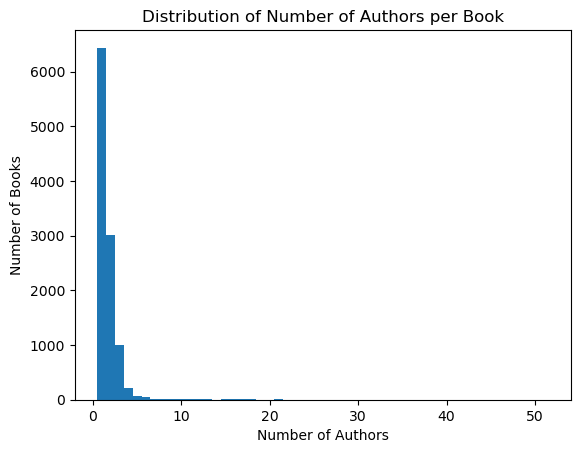

In [56]:
# Plot a histogram to visualize the distribution of the number of authors.

import matplotlib.pyplot as plt

plt.hist(df['num_authors'], bins=range(1, df['num_authors'].max()+2), align='left')
plt.xlabel('Number of Authors')
plt.ylabel('Number of Books')
plt.title('Distribution of Number of Authors per Book')
plt.show()

__Analyze Impact on Ratings:__

In [57]:
# Grouped Analysis: Group by the number of authors and calculate the average rating.

grouped = df.groupby('num_authors')['average_rating'].mean().reset_index()
print(grouped)

    num_authors  average_rating
0             1        3.923226
1             2        3.968322
2             3        3.999639
3             4        4.055136
4             5        4.006154
5             6        4.005192
6             7        4.127619
7             8        3.788000
8             9        3.786250
9            10        4.061667
10           11        3.940000
11           12        4.008000
12           13        3.886250
13           15        3.990000
14           16        3.926667
15           17        3.676667
16           18        3.772500
17           19        3.727500
18           20        3.616667
19           21        3.761429
20           22        3.580000
21           23        3.535000
22           24        3.663333
23           25        3.610000
24           26        3.990000
25           27        4.170000
26           28        4.210000
27           32        3.870000
28           33        3.500000
29           35        4.350000
30      

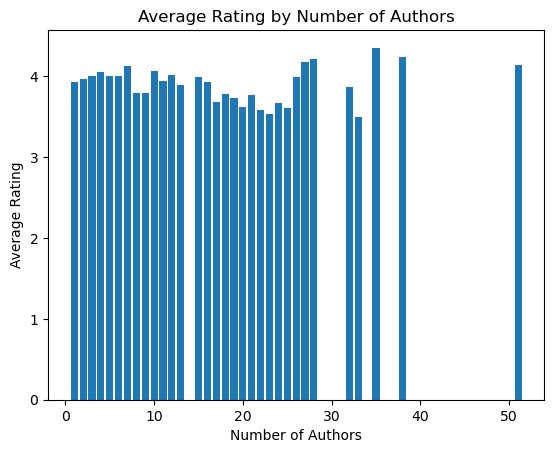

In [58]:
# Plot the average rating by the number of authors

plt.bar(grouped['num_authors'], grouped['average_rating'])
plt.xlabel('Number of Authors')
plt.ylabel('Average Rating')
plt.title('Average Rating by Number of Authors')
plt.show()

In [59]:
# Check if there's a significant correlation between the number of authors and the average rating

correlation = df[['num_authors', 'average_rating']].corr().iloc[0, 1]
print(f"Correlation between number of authors and average rating: {correlation:.2f}")

Correlation between number of authors and average rating: 0.03


#### Conclusion: 
Given our correlation value of __0.03__ ==> There's almost no linear relationship between the number of authors and the average rating of a book, meaning that the number of authors a book has does not significantly influence its average rating in a predictable linear manner.

### 2.2 Handling imbalanced data in language distribution using combined Undersampling and SMOTE as well as ADASYN 


To address the imbalance in the language_code column to ensure the model is not biased towards any particular language, we use SMOTE and ADASYN method to generate new instances of the minority class, which is books not in English languages.

In [60]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


### Preprocessing for SMOTE:

Before applying techniques like SMOTE, it's essential to preprocess the data to ensure it's in a suitable format.

As the SMOTE method from the imblearn library doesn't handle datasets with string data and missing values directly, we start by checking and identifying which columns have missing values & then converting string columns to a numerical format.



<h4> Verify if there are null values </h4>

In [62]:
# Verify if there are null values

df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
publication_year      2
num_authors           0
dtype: int64

In [63]:
df[df['publication_date'].isnull()]

bookID                                              title  \
8180    31373  In Pursuit of the Proper Sinner (Inspector Lyn...   
11098   45531         Montaillou  village occitan de 1294 à 1324   

                                               authors  average_rating  \
8180                                 Elizabeth  George            4.10   
11098  Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie            3.96   

             isbn         isbn13 language_code  num_pages  ratings_count  \
8180   0553575104  9780553575101           eng        718          10608   
11098  2070323285  9782070323289           fre        640             15   

       text_reviews_count publication_date       publisher  publication_year  \
8180                  295              NaT    Bantam Books               NaN   
11098                   2              NaT  Folio histoire               NaN   

       num_authors  
8180             1  
11098            2

Looking closely at these 2 missing rows of '_publication_date_' columns, we have 1 observation in 'fre' language and there are only a few observations in languages other than English, hence removing this row may create bigger bias to the dataset.  

As the above correlation analysis proves that there are no trends in ratings over the years using the publication_date and publication_year column, I decide to drop these both columns.

In [64]:
df = df.drop(columns=["publication_date", "publication_year"])

In [65]:
# verify again the non-null dataset

print(df.isnull().sum())

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publisher             0
num_authors           0
dtype: int64


In [267]:
raw_df = df.copy()

In [266]:
df = raw_df.copy()

In [268]:
# Drop non-numerical columns that are not essential for analysis
df = df.drop(['title', 'authors', 'isbn', 'isbn13', 'publisher'], axis=1)

In [269]:
# Label Encoding for 'language_code'

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['language_code'] = le.fit_transform(df['language_code'])

In [271]:
df['language_code'].value_counts()

5     8754
4     1399
3      211
21     209
7      133
8       87
13      45
16      19
24      13
19      10
11       8
2        7
12       5
6        3
14       3
20       2
18       1
9        1
23       1
22       1
17       1
10       1
15       1
1        1
0        1
Name: language_code, dtype: int64

The distribution of __language_code_encoded__ shows a significant imbalance. The majority class (encoded as 5) has 8754 samples, while many minority classes have very few samples, some even just 1.

Given this distribution, here's a revised approach to handle the imbalance:
- __Exclude the minority classes with very few instances__: language codes with only 1-3 instances in the dataset might be best to be excluded from the dataset as they pose a challenge for SMOTE, which relies on k-nearest neighbors to generate synthetic samples. Moreover, such a small number of instances won't provide meaningful information for the model.
- __Undersampling__: Randomly undersample the majority class to a number that's not too low but reduces the imbalance. For instance, we can reduce it to around 2000 samples.

- __SMOTE__: Apply SMOTE to oversample the minority classes. Set k_neighbors to a value less than 5 but greater than 1 to handle classes with very few samples.

In [272]:
# Filter out classes with only 1-3 instances

value_counts = df['language_code'].value_counts()
classes_to_exclude = value_counts[value_counts < 4].index

df_filtered = df[~df['language_code'].isin(classes_to_exclude)]

In [275]:
# Splitting the dataset into training (80%) and testing (20%) sets

from sklearn.model_selection import train_test_split

X = df_filtered.drop(columns=['average_rating']) 
y_language = df_filtered['language_code']

X_train, X_test, y_train, y_test = train_test_split(X, y_language, test_size=0.2, random_state=42)

### Handling Imbalance using SMOTE:

In [276]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# 1. Undersampling
# Determine the majority class in the training data
majority_class = y_train.value_counts().idxmax()
majority_samples = y_train.value_counts().max()

# Set a target number for the majority class after undersampling
target_samples = int(0.5 * majority_samples) 

# Create a dictionary for the undersampling strategy
undersampling_strategy = {majority_class: target_samples}

rus = RandomUnderSampler(sampling_strategy=undersampling_strategy)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

# 2. Adaptive SMOTE
oversample_threshold = int(0.75 * target_samples)
strategy = {}
for class_code, count in pd.Series(y_undersampled).value_counts().items():
    if count < oversample_threshold:
        strategy[class_code] = oversample_threshold

smote = SMOTE(sampling_strategy=strategy, k_neighbors=3, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_undersampled, y_undersampled)

In [277]:
print(pd.Series(y_train_resampled).value_counts())

5     3500
2     2625
3     2625
4     2625
7     2625
8     2625
11    2625
12    2625
13    2625
16    2625
19    2625
21    2625
24    2625
Name: language_code, dtype: int64


The resampled data is not natural as some classes are oversampled to a consistent number of 2625, which might not be the most natural representation of the data, potentially leading to a model that's biased towards the synthetic data ==> I try a more adaptive approach using a combination of random undersampling and adaptive synthetic sampling (ADASYN)

### Handling Imbalance using ADASYN:

In [280]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN

# 1. Undersampling
# Determine the majority class in the training data
majority_class = y_train.value_counts().idxmax()
majority_samples = y_train.value_counts().max()

# Set a target number for the majority class after undersampling
target_samples = int(0.3 * majority_samples)  

# Create a dictionary for the undersampling strategy
undersampling_strategy = {majority_class: target_samples}

rus = RandomUnderSampler(sampling_strategy=undersampling_strategy)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

# 2. ADASYN Oversampling
# Determine the smallest class size after undersampling
min_class_size = y_undersampled.value_counts().min()

# Set n_neighbors to be one less than the smallest class size
adasyn = ADASYN(n_neighbors=min_class_size-1, random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_undersampled, y_undersampled)

In [281]:
# Print the distribution
print(pd.Series(y_train_resampled).value_counts())

16    2105
7     2101
24    2101
2     2100
5     2100
12    2100
19    2100
11    2097
13    2095
8     2085
3     2063
21    2055
4     1954
Name: language_code, dtype: int64


Using the resampled balanced training dataset of 'language_code' from ADASYN method to train the model and then evaluate their performance on the untouched testing set (X_test and y_test).

In [290]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Model Selection
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Model Training
model.fit(X_train_resampled, y_train_resampled)

# 3. Predict on the Testing Set
y_pred = model.predict(X_test)

# 4. Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R-squared: 1.00
